In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

df = pd.read_csv('/content/world_bank_data_cleaned.csv')

In [9]:
df

,Country Name,Country Code,Year,"Agriculture, forestry, and fishing, value added (% of GDP)",CO2 emissions (metric tons per capita),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Exports of goods and services (% of GDP),"Foreign direct investment, net inflows (BoP, current US$)",Forest area (sq. km),...,Population growth (annual %),"Population, total","Prevalence of HIV, total (% of population ages 15-49)","Primary completion rate, total (% of relevant age group)","School enrollment, primary (% gross)","School enrollment, secondary (% gross)",Surface area (sq. km),Tax revenue (% of GDP),Time required to start a business (days),Urban population growth (annual %)
0,Afghanistan,AFG,2014,22.14,0.28,NaN,NaN,NaN,4.297526e+07,12084.4,...,3.66,32716210,0.1,NaN,109.12,54.24,652860.0,6.88,8.5,4.53
1,Afghanistan,AFG,2015,20.63,0.30,NaN,NaN,NaN,1.691466e+08,12084.4,...,3.12,33753499,0.1,NaN,106.18,53.29,652860.0,7.59,8.5,4.00
2,Afghanistan,AFG,2016,25.74,0.27,NaN,NaN,NaN,9.359132e+07,12084.4,...,2.58,34636207,0.1,82.91,106.15,53.51,652860.0,9.50,8.5,3.45
3,Afghanistan,AFG,2017,26.42,0.28,NaN,NaN,NaN,5.153390e+07,12084.4,...,2.87,35643418,0.1,87.25,106.13,55.40,652860.0,9.90,8.5,3.78
4,Afghanistan,AFG,2018,22.04,0.30,NaN,NaN,NaN,1.194351e+08,12084.4,...,2.89,36686784,0.1,88.74,107.78,57.04,652860.0,NaN,8.5,3.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,Zimbabwe,ZWE,2019,9.82,0.66,NaN,NaN,27.55,2.495000e+08,174906.5,...,1.99,15354608,12.6,90.23,97.48,NaN,390760.0,NaN,27.0,1.99
2036,Zimbabwe,ZWE,2020,8.77,0.53,NaN,NaN,22.29,1.503600e+08,174445.8,...,2.03,15669666,12.1,91.87,97.38,NaN,390760.0,NaN,NaN,2.13
2037,Zimbabwe,ZWE,2021,8.85,NaN,NaN,NaN,22.78,2.500000e+08,173985.1,...,2.05,15993524,11.6,86.10,96.01,NaN,390760.0,NaN,NaN,2.23
2038,Zimbabwe,ZWE,2022,7.19,NaN,NaN,NaN,27.96,3.415000e+08,NaN,...,2.02,16320537,11.0,86.12,95.79,NaN,NaN,NaN,NaN,2.31


In [10]:
df.columns

Index(['Country Name', 'Country Code', 'Year',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'CO2 emissions (metric tons per capita)',
       'Electric power consumption (kWh per capita)',
       'Energy use (kg of oil equivalent per capita)',
       'Exports of goods and services (% of GDP)',
       'Foreign direct investment, net inflows (BoP, current US$)',
       'Forest area (sq. km)', 'GDP (current US$)', 'GDP growth (annual %)',
       'Immunization, measles (% of children ages 12-23 months)',
       'Imports of goods and services (% of GDP)',
       'Industry (including construction), value added (% of GDP)',
       'Inflation, GDP deflator (annual %)',
       'Life expectancy at birth, total (years)',
       'Military expenditure (% of GDP)',
       'Mobile cellular subscriptions (per 100 people)',
       'Mortality rate, under-5 (per 1,000 live births)', 'Net migration',
       'Population growth (annual %)', 'Population, total',
       'Prevalen

# GDP Growth Over Time for Top 10 Countries by GDP

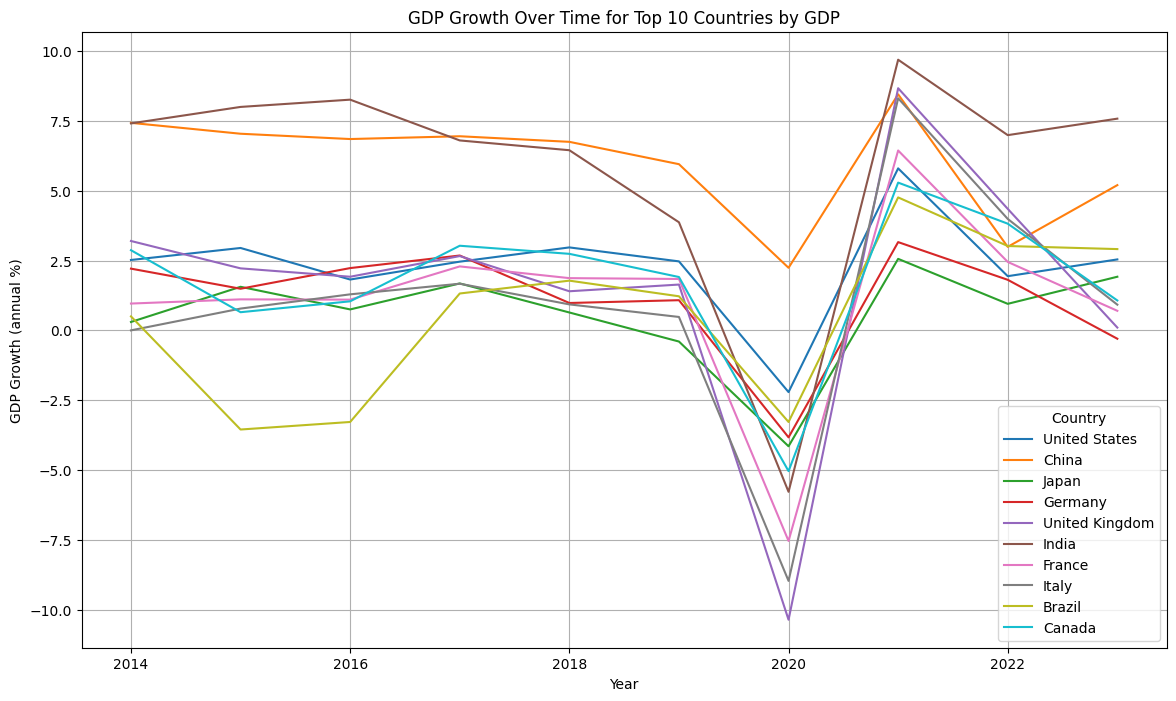

In [11]:
# Aggregate total GDP for each country across all years
total_gdp = df.groupby('Country Name')['GDP (current US$)'].sum()

# Get the top 10 countries by total GDP
top_countries = total_gdp.nlargest(10).index.tolist()

# Plot GDP growth over time for the top 10 countries
plt.figure(figsize=(14, 8))

for country in top_countries:
    country_data = df[df['Country Name'] == country]
    sns.lineplot(data=country_data, x='Year', y='GDP growth (annual %)', label=country)

plt.title('GDP Growth Over Time for Top 10 Countries by GDP')
plt.xlabel('Year')
plt.ylabel('GDP Growth (annual %)')
plt.legend(title='Country')
plt.grid(True)
plt.show()

Key Observations:

Sharp Decline in 2020:

All countries experienced a significant drop in GDP growth rates in 2020. This sharp decline correlates with the global economic impact of the COVID-19 pandemic.

Rebound in 2021:

In 2021, most countries showed a strong recovery in GDP growth, with several countries, such as the United States, China, and India, experiencing substantial positive growth rates. This rebound highlights the global economic recovery post-pandemic.

China and India:

China consistently had a higher GDP growth rate compared to other major economies throughout the period, although it also faced a significant drop in 2020.
India experienced notable fluctuations, with a severe contraction in 2020 followed by a strong recovery in 2021.

Japan and Germany:

Japan and Germany's GDP growth rates were relatively stable before 2020, followed by a notable contraction and a modest recovery.

United Kingdom and France:

The United Kingdom and France both had relatively low growth rates compared to other major economies. The UK's GDP growth fluctuated more, particularly during 2020 and 2021.

# Average GDP vs. Average Life Expectancy

In [12]:
# Calculate the average GDP and Life Expectancy for each country
df_avg = df.groupby('Country Name', as_index=False).agg({
    'GDP (current US$)': 'mean',
    'Life expectancy at birth, total (years)': 'mean'
})

# Scatter plot of average GDP vs. average Life Expectancy
fig = px.scatter(df_avg, x='GDP (current US$)', y='Life expectancy at birth, total (years)',
                 color='Country Name', hover_name='Country Name',
                 title='Average GDP vs. Average Life Expectancy')
fig.update_layout(xaxis_title='Average GDP (current US$)',
                  yaxis_title='Average Life Expectancy at Birth (years)')
fig.show()


Key Observations:

Outlier with High GDP:

There is a distinct outlier with a very high average GDP, exceeding 20 trillion USD. However, this country (likely the United States) does not have the highest life expectancy.

General Trends:

While a high GDP doesn't necessarily correlate with the highest life expectancy, countries with very low GDPs tend to have a wider range of life expectancies. This suggests that while economic prosperity can be a factor in higher life expectancy, other factors such as healthcare, social services, and overall quality of life also play significant roles.

# Average Net Migration vs. Surface Area

In [13]:
# Calculate the average Net Migration and Surface Area for each country
df_avg = df.groupby('Country Name', as_index=False).agg({
    'Net migration': 'mean',
    'Surface area (sq. km)': 'mean'
})

fig = px.scatter(df_avg, x='Surface area (sq. km)', y='Net migration',
                 color='Country Name', hover_name='Country Name',
                 title='Average Net Migration vs. Surface Area')
fig.update_layout(xaxis_title='Average Surface Area (sq. km)',
                  yaxis_title='Average Net Migration')
fig.show()

Key Observations:

Clustering Near the Origin:

Most countries are clustered near the origin of the chart, indicating that they have relatively low average surface areas and net migration values. This suggests that many countries do not experience significant net migration or have large land areas.

Outliers with High Net Migration:

A notable outlier is visible in the upper portion of the chart with an average net migration exceeding 1 million people. This indicates that this country has a high rate of people moving in or out compared to others.

Outliers with Large Surface Areas:

Another outlier is observed on the far right side of the chart, indicating a country with a very large average surface area. This point likely represents a country with a vast geographical area but relatively moderate net migration compared to the high surface area.

Diverse Migration Trends:

There are countries with significant net migration but smaller surface areas(Germany), as well as those with large areas but minimal net migration(Brazil, Australia, China). This diversity shows that land size and migration patterns do not necessarily correlate.

Zero or Negative Net Migration:

Several countries have either zero or negative average net migration, indicating that they may have balanced immigration and emigration or more people leaving than arriving.

# CO2 Emissions per Capita by Country (2023)

In [14]:
year_data = df[df['Year'] == 2020]

# Create a choropleth map
fig = go.Figure(data=go.Choropleth(
    locations=year_data['Country Code'],
    z=year_data['CO2 emissions (metric tons per capita)'],
    text=year_data['Country Name'],
    colorscale='RdYlGn',
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title="CO2 Emissions<br>(metric tons per capita)"
))

fig.update_layout(
    title_text='CO2 Emissions per Capita by Country (2023)',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()


The map highlights the significant disparities in CO2 emissions per capita among countries. Developed nations with industrialized economies tend to have higher emissions, while developing countries with economies heavily reliant on agriculture and less energy-intensive industries generally have lower emissions per capita.

Observations:

High Emissions: Countries in shades of red, particularly the Middle East, North America, and parts of Asia, exhibit higher CO2 emissions per capita.

Moderate Emissions: Regions with yellow to orange hues, including parts of Europe, South America, and Australia, have moderate CO2 emissions.

Lower Emissions: Countries in green shades, primarily in Africa and South America, demonstrate lower CO2 emissions per capita.

# Population by Country (2023)

In [15]:
year_data = df[df['Year'] == 2023]

# Create a choropleth map
fig = go.Figure(data=go.Choropleth(
    locations=year_data['Country Code'],
    z=year_data['Population, total'],
    text=year_data['Country Name'],
    colorscale='RdYlGn',
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title="Population<br>"
))

fig.update_layout(
    title_text='Population by Country (2023)',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()


Key Observations:

Population Distribution:

The map reveals significant variations in population density across different regions.

Densely Populated Areas: China and India appear as the most populous countries, with their landmasses shaded in the darkest red, indicating a population exceeding 1.2 billion.

Sparsely Populated Areas: Large swathes of land, particularly in Africa, Australia, and parts of North America and South America, are depicted in lighter shades of green, signifying lower population densities.

# Ease of Doing Business for Top 10 GDP Countries (2014-2020)

In [16]:
year_2023_data = df[df['Year'] == 2023]

# Get the top 10 GDP countries for the year 2023
top_10_gdp_countries = year_2023_data.nlargest(10, 'GDP (current US$)')['Country Name']

# Filter data for the top 10 GDP countries and years 2014 to 2020
filtered_data = df[(df['Country Name'].isin(top_10_gdp_countries)) & (df['Year'].between(2014, 2020))]

fig = px.line(
    filtered_data,
    x='Year',
    y='Time required to start a business (days)',
    color='Country Name',
    title='Ease of Doing Business (Time Required to Start a Business) for Top 10 GDP Countries (2014-2020)',
    labels={'Time required to start a business (days)': 'Days Required to Start a Business'}
)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Days Required to Start a Business',
    legend_title='Country Name',
    template='plotly_white'
)

fig.show()

Observations:

Significant Decreases: China and India show substantial reductions in the time needed to start a business during this period.

Relatively Stable: Countries like the United States, Japan, and Germany exhibit relatively stable timeframes for starting a business.

# Military Expenditure (% of GDP) - Top 10 vs. Least 10 Countries (2022)

In [17]:
data_2022 = df[df['Year'] == 2022]

# Sort data to find top 10 and least 10 countries based on military expenditure (% of GDP)
top_10 = data_2022.nlargest(10, 'Military expenditure (% of GDP)')
least_10 = data_2022.nsmallest(10, 'Military expenditure (% of GDP)')

plot_data = pd.concat([top_10, least_10])

# Create the bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    x=top_10['Country Name'],
    y=top_10['Military expenditure (% of GDP)'],
    name='Top 10 Countries',
    marker_color='blue',
    text=top_10['Military expenditure (% of GDP)'].round(2),
    textposition='outside'
))

fig.add_trace(go.Bar(
    x=least_10['Country Name'],
    y=least_10['Military expenditure (% of GDP)'],
    name='Least 10 Countries',
    marker_color='red',
    text=least_10['Military expenditure (% of GDP)'].round(2),
    textposition='outside'
))

fig.update_layout(
    title='Military Expenditure (% of GDP) - Top 10 vs. Least 10 Countries (2022)',
    xaxis_title='Country',
    yaxis_title='Military Expenditure (% of GDP)',
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
    barmode='group',  # Group bars
    template='plotly_white'  # Optional: use a white template for a cleaner look
)

fig.show()

Observations:

Top 10 Countries: Ukraine has the highest military expenditure at 7.42% of GDP, followed by Saudi Arabia at 6.96%. The remaining countries in the top 10 have expenditures ranging from 5.44% to 4.51%.

Least 10 Countries: Malta has the lowest military expenditure at 0.5% of GDP, followed by Guatemala at 0.46%. The remaining countries in the least 10 have expenditures ranging from 0.07% to 0.41%.

# Energy Use vs. Economic Development

In [18]:
# Calculate the average of given years for each country
average_data = df.groupby('Country Name').agg({
    'GDP (current US$)': 'mean',
    'Energy use (kg of oil equivalent per capita)': 'mean'
}).reset_index()

# Create the scatter plot
fig = px.scatter(
    average_data,
    x='GDP (current US$)',
    y='Energy use (kg of oil equivalent per capita)',
    text='Country Name',
    title='Energy Use vs. Economic Development',
    labels={'GDP (current US$)': 'GDP (current US$)',
            'Energy use (kg of oil equivalent per capita)': 'Energy Use (kg of oil equivalent per capita)'},
    hover_name='Country Name'
)

fig.update_layout(
    xaxis_title='GDP (current US$)',
    yaxis_title='Energy Use (kg of oil equivalent per capita)',
    template='plotly_white',  # Optional: use a white template for a cleaner look
    title={'text': 'Energy Use vs. Economic Development', 'x': 0.5}  # Center title
)

fig.show()

Observations:

General Trend: There seems to be a positive correlation between GDP and energy use per capita, meaning that countries with higher GDPs tend to have higher energy consumption per person.

Outliers: Some countries, such as Qatar, Iceland, and the United Arab Emirates, have significantly higher energy use per capita compared to their GDP. These could be attributed to factors like abundant fossil fuel resources or energy-intensive industries.

Clusters: There are clusters of countries with similar GDP and energy use levels. For instance, there's a dense cluster of countries in the lower left corner, representing countries with lower GDPs and energy consumption.